# Figure 4: Strength of modulation by CT feedback is dependent on the presence or absence of the visual stimulus.

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import random
import scipy
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## utils

In [2]:
from utils import *

In [4]:
color_dict = get_color_dict(color_names=['blue', 'orange', 'green', 'red',
                                         'purple', 'brown', 'pink', 'gray',
                                         'yellow', 'lightblue'])

In [5]:
color_dict['blue_pink'] = '#9467BD'

# Example neuron

In [11]:
key = {'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 19}

## PSTHs Control vs. CT FB suppressed

Load data:

In [17]:
filename = './data/opto_cond_psths/{:s}_s{:02d}_e{:02d}_u{:02d}_30ms_180624.h5'.format(key['m'], key['s'], key['e'], key['u'])
df = pd.read_hdf(filename, "df")

In [21]:
filename = './data/opto_cond_psths/{:s}_s{:02d}_e{:02d}_u{:02d}_100ms_180624.h5'.format(key['m'], key['s'], key['e'], key['u'])
df = pd.read_hdf(filename, "df")

In [8]:
df

,m,s,e,u,omi_movie,omi_blank,psths_cond_movie,psths_cond_blank,midbins,labels
0,Ntsr1Cre_2019_0008,5,8,19,-0.454016,-0.652742,"[[9.070868502360984, 9.069560964781246, 9.0669...","[[8.245554612470913, 8.24265341342754, 8.23685...","[[-0.55, -0.5489999999999999, -0.548, -0.54699...",off-on
1,Ntsr1Cre_2019_0008,5,8,19,-0.454016,-0.652742,"[[14.02656315880936, 14.027794457614158, 14.03...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[nan],on-on
2,Ntsr1Cre_2019_0008,5,8,19,-0.454016,-0.652742,"[[11.154468913983262, 11.157079252564197, 11.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[nan],on-off
3,Ntsr1Cre_2019_0008,5,8,19,-0.454016,-0.652742,"[[45.59400676741366, 45.596122608702814, 45.60...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",[nan],off-off


Get data:

In [22]:
movie_psths = df['psths_cond_movie']
blank_psths = df['psths_cond_blank']
movie_bins = df['midbins'][0][0]
blank_bins = df['midbins'][0][0]
labels = df['labels']

Plotting:

In [23]:
# x-axis
data_fs = 60
filt_len = 50
T = 1 / data_fs
ts = np.arange(-T * filt_len, 0, T)
filt_len2 = 50
ts_spont = np.arange(-T * filt_len2, 0, T)

#0173b2 1.0
k 0.4
#9467BD 1.0
k 0.2


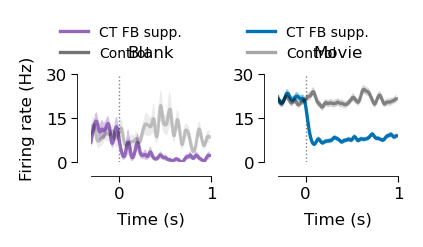

In [20]:
figsize = (2, 1.1)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['b']
    ax.plot([0], [0], color_dict['blue'], lw=1.2)
    ax.plot([0], [0], 'k', lw=1.2, alpha=0.35)
    
    ax = plot_opto_cond_psth(key, movie_psths, movie_bins, labels,
                             offsets=[-0.3, 0], optocond=['off-on',  'off-off'], stimcond='stim',
                             binw=0.032,
                             plot_err='sem', ax=ax, 
                             title_info=None,  legend=True, legend_frame=False,
                             legend_labels=['Movie CT FB supp.', 'on-on', 'on-off', 'Control'],
                             alphas = [1.0, 0.4, 1.0, 0.4],
                             widths=[1.2, 1.2, 1.2, 1.2])
    
    ax.set_ylim([0,30])
    ax.set_xlim([-0.3, 1])
    ax.set_yticks([0, 15, 30])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('')
    ax.set_title('Movie', y=1.1)
    ax.legend(['CT FB supp.', 'Control'], loc='upper center',
              bbox_to_anchor=[0.25, 1.7], ncol=1, frameon=False)

    ax = ax_dict['a']
    ax.plot([0], [0], color_dict['blue_pink'], lw=1.2)
    ax.plot([0], [0], 'k', lw=1.2, alpha=0.55)
    ax = plot_opto_cond_psth(key, blank_psths, blank_bins, labels,
                             offsets=[-0.6, 0], optocond=['off-on',  'off-off'], stimcond='spont',
                             binw=0.032,
                             plot_err='sem', ax=ax, 
                             title_info=None,  legend=True, legend_frame=False,
                             legend_labels=['Blank CT FB supp.', 'on-on', 'on-off', 'Control'],
                             colors=[color_dict['blue_pink'], color_dict['blue_pink'], 'k', 'k'], widths=[1.2, 1.2, 1.2, 1.2])
    ax.set_ylim([0, 30])
    ax.set_xlim([-0.3, 1])
    ax.set_yticks([0, 15, 30])
    ax.set_ylabel('Firing rate (Hz)')
    ax.set_xlabel('Time (s)')
    ax.set_title('Blank', y=1.1)
    ax.legend(['CT FB supp.', 'Control'], loc='upper center',
              bbox_to_anchor=[0.25, 1.7], ncol=1, frameon=False)


    sns.despine(offset=5, trim=False, ax=ax)

#0173b2 1.0
k 0.4
#9467BD 1.0
k 0.2


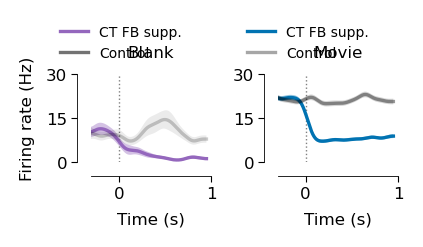

In [24]:
figsize = (2, 1.1)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['b']
    ax.plot([0], [0], color_dict['blue'], lw=1.2)
    ax.plot([0], [0], 'k', lw=1.2, alpha=0.35)
    
    ax = plot_opto_cond_psth(key, movie_psths, movie_bins, labels,
                             offsets=[-0.3, 0], optocond=['off-on',  'off-off'], stimcond='stim',
                             binw=0.032,
                             plot_err='sem', ax=ax, 
                             title_info=None,  legend=True, legend_frame=False,
                             legend_labels=['Movie CT FB supp.', 'on-on', 'on-off', 'Control'],
                             alphas = [1.0, 0.4, 1.0, 0.4],
                             widths=[1.2, 1.2, 1.2, 1.2])
    
    ax.set_ylim([0,30])
    ax.set_xlim([-0.3, 1])
    ax.set_yticks([0, 15, 30])
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('')
    ax.set_title('Movie', y=1.1)
    ax.legend(['CT FB supp.', 'Control'], loc='upper center',
              bbox_to_anchor=[0.25, 1.7], ncol=1, frameon=False)

    ax = ax_dict['a']
    ax.plot([0], [0], color_dict['blue_pink'], lw=1.2)
    ax.plot([0], [0], 'k', lw=1.2, alpha=0.55)
    ax = plot_opto_cond_psth(key, blank_psths, blank_bins, labels,
                             offsets=[-0.6, 0], optocond=['off-on',  'off-off'], stimcond='spont',
                             binw=0.032,
                             plot_err='sem', ax=ax, 
                             title_info=None,  legend=True, legend_frame=False,
                             legend_labels=['Blank CT FB supp.', 'on-on', 'on-off', 'Control'],
                             colors=[color_dict['blue_pink'], color_dict['blue_pink'], 'k', 'k'], widths=[1.2, 1.2, 1.2, 1.2])
    ax.set_ylim([0, 30])
    ax.set_xlim([-0.3, 1])
    ax.set_yticks([0, 15, 30])
    ax.set_ylabel('Firing rate (Hz)')
    ax.set_xlabel('Time (s)')
    ax.set_title('Blank', y=1.1)
    ax.legend(['CT FB supp.', 'Control'], loc='upper center',
              bbox_to_anchor=[0.25, 1.7], ncol=1, frameon=False)


    sns.despine(offset=5, trim=False, ax=ax)

# Model CT FB supp. (opto) kernels

### Load data:

In [25]:
filename = './data/population_data_movie_June24.h5'
df_movie = pd.read_hdf(filename, "df")

In [26]:
filename = './data/population_data_blank_June24.h5'
df_blank = pd.read_hdf(filename, "df")

Restrict to one experiment:

In [27]:
# DF experiment
df_movie_e = df_movie[(df_movie['m']==key['m']) & (df_movie['s']==key['s']) &
                      (df_movie['e']==key['e']) & (df_movie['u']==key['u'])].reset_index()

In [28]:
# DF experiment
df_blank_e = df_blank[(df_blank['m']==key['m']) & (df_blank['s']==key['s']) &
                      (df_blank['e']==key['e']) & (df_blank['u']==key['u'])].reset_index()

Get data:

In [29]:
movie_r = df_movie['perm_score_true_mean']
blank_r = df_blank['perm_score_true_mean']

### Movie condition

In [30]:
movie_opto_kernel = np.array(df_movie_e['filt_opto'][0])

In [31]:
movie_opto_all_kernels = np.array(df_movie['filt_opto'])

In [32]:
movie_opto_significant_models_df = df_movie[(df_movie['perm_pvalue_opto'] <= 0.05)].reset_index()

In [33]:
movie_opto_significant_kernels = np.vstack(movie_opto_significant_models_df['filt_opto'])

In [34]:
movie_opto_all_kernels_output = np.vstack(df_movie['opto_filt_output'])

KeyError: 'opto_filt_output'

In [36]:
movie_opto_kernel.shape, movie_opto_significant_kernels.shape

((50,), (12, 50))

In [37]:
movie_mean_kernel = np.mean(movie_opto_significant_kernels, 0)
movie_sem_kernel = stats.sem(movie_opto_significant_kernels, 0)

In [38]:
movie_prediction = np.array(df_movie_e['opto_triggered_yhat'][0])
movie_prediction_mean = np.mean(movie_prediction, 0)

In [39]:
movie_all_prediction = np.array(df_movie['opto_triggered_yhat'])
movie_all_prediction_mean = np.array([np.mean(p, 0) for p in movie_prediction])

In [40]:
movie_sig_prediction = np.array(movie_opto_significant_models_df['opto_triggered_yhat'])
movie_sig_prediction_mean =np.array([np.mean(p, 0) for p in movie_sig_prediction])

In [42]:
movie_sig_prediction_mean_mean = np.mean(movie_sig_prediction_mean, 0)
movie_sig_prediction_mean_sem = stats.sem(movie_sig_prediction_mean, 0)

In [43]:
movie_prediction[0].shape

(120,)

In [44]:
movie_model_omis = np.vstack(df_movie['yhat_omis'])

In [45]:
movie_data_omis = np.vstack(df_movie['data_omis'])

In [46]:
np.min(movie_opto_kernel)

-0.9475023

In [47]:
sig_movie_min = np.array([np.min(o) for o in movie_opto_significant_kernels])

In [48]:
all_movie_min = np.array([np.min(o) for o in movie_opto_all_kernels])

### Blank condition

In [49]:
blank_opto_kernel = np.array(df_blank_e['filt_opto'][0])

In [50]:
blank_opto_all_kernels = np.array(df_blank['filt_opto'])

In [51]:
blank_opto_significant_models_df = df_blank[(df_blank['perm_pvalue_opto'] <= 0.05)].reset_index()

In [52]:
blank_opto_significant_kernels = np.vstack(blank_opto_significant_models_df['filt_opto'])

In [53]:
blank_opto_kernel.shape, blank_opto_significant_kernels.shape

((50,), (21, 50))

In [54]:
blank_mean_kernel = np.mean(blank_opto_significant_kernels, 0)
blank_sem_kernel = stats.sem(blank_opto_significant_kernels, 0)

In [55]:
blank_prediction = np.array(df_blank_e['opto_triggered_yhat'][0])
blank_prediction_mean = np.mean(blank_prediction, 0)

In [56]:
blank_all_prediction = np.array(df_blank['opto_triggered_yhat'])
blank_all_prediction_mean = np.array([np.mean(p, 0) for p in blank_prediction])

In [57]:
blank_sig_prediction = np.array(blank_opto_significant_models_df['opto_triggered_yhat'])
blank_sig_prediction_mean =np.array([np.mean(p, 0) for p in blank_sig_prediction])

In [59]:
blank_sig_prediction_mean_mean = np.mean(blank_sig_prediction_mean, 0)
blank_sig_prediction_mean_sem = stats.sem(blank_sig_prediction_mean, 0)

In [60]:
blank_model_omis = np.vstack(df_blank['yhat_omis'])

In [61]:
blank_data_omis = np.vstack(df_blank['data_omis'])

In [62]:
np.min(blank_opto_kernel)

-1.8066982

In [63]:
sig_blank_min = np.array([np.min(o) for o in blank_opto_significant_kernels])

In [64]:
all_blank_min = np.array([np.min(o) for o in blank_opto_all_kernels])

### Firing rates

In [65]:
fr_movie_opto, fr_movie_ctrl = df_movie['fr_opto'], df_movie['fr_ctrl']

In [66]:
fr_blank_opto, fr_blank_ctrl = df_blank['fr_opto'], df_blank['fr_ctrl']

In [67]:
fr_movie_opto_sig, fr_movie_ctrl_sig = movie_opto_significant_models_df['fr_opto'], movie_opto_significant_models_df['fr_ctrl']

In [68]:
fr_blank_opto_sig, fr_blank_ctrl_sig = blank_opto_significant_models_df['fr_opto'], blank_opto_significant_models_df['fr_ctrl']

In [69]:
key_fr_movie_opto, key_fr_movie_ctrl = df_movie_e['fr_opto'][0], df_movie_e['fr_ctrl'][0]

In [70]:
key_fr_blank_opto, key_fr_blank_ctrl = df_blank_e['fr_opto'][0], df_blank_e['fr_ctrl'][0]

### Plotting:

In [71]:
# x-axis
data_fs = 60
filt_len = 50
T = 1 / data_fs
ts = np.arange(-T * filt_len, 0, T)
filt_len2 = 50
ts_spont = np.arange(-T * filt_len2, 0, T)

# x-axis
ts_output = np.arange(-1.0, 1, T)

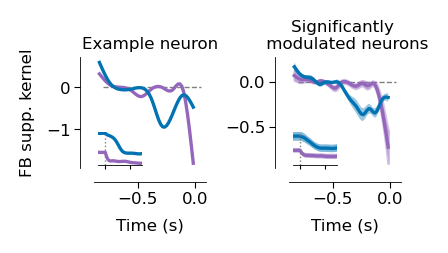

In [73]:
figsize = (2.0, 1.15)
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.hlines(0, -0.8, 0.05, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts_spont, blank_opto_kernel, color=color_dict['blue_pink'], zorder=1, lw=1.2, label='Blank')
    ax.plot(ts, movie_opto_kernel, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax.set_ylabel('FB supp. kernel')
    ax.set_xlabel('Time (s)')
    ax.set_title('Example neuron')
    
    # Plot inset 
    ax_ins = inset_axes(ax, width="40%", height="30%", loc=3, borderpad=0.25)
    ax_ins.plot(ts_output, blank_prediction_mean, color=color_dict['blue_pink'], zorder=1, lw=1.2, label='Blank')
    ax_ins.plot(ts_output, movie_prediction_mean,
                color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax_ins.axvline(x=0, linestyle=':', c='grey', zorder=1)  # event onset time
    ax_ins.patch.set_facecolor('none')
    ax_ins.spines['left'].set_visible(False)
    ax_ins.spines['right'].set_visible(False)
    ax_ins.tick_params(bottom=True, left=False, right=True,
                       labelbottom=True, labelleft=False, labelright=True,
                       length=1.5, pad=1, labelsize=5)
    ax_ins.set_yticks([])
    ax_ins.set_xticks([0, 0.5], labels=['', ''])
    ax_ins.set_xlim([-0.15, 0.75])
    
    sns.despine(offset=5, trim=False, ax=ax)
    
    
    ax = ax_dict['b']
    ax.hlines(0, -0.8, 0.05, 'gray', linestyle='--', zorder=-1)
    ax.plot(ts_spont, blank_mean_kernel, color=color_dict['blue_pink'], zorder=1, lw=1.2, label='Blank')
    ax.fill_between(ts_spont, blank_mean_kernel - blank_sem_kernel, blank_mean_kernel + blank_sem_kernel, color=color_dict['blue_pink'], alpha=0.4)
    ax.plot(ts, movie_mean_kernel, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax.fill_between(ts, movie_mean_kernel - movie_sem_kernel , movie_mean_kernel + movie_sem_kernel, color=color_dict['blue'], edgecolor=None, alpha=0.4)
    ax.set_ylabel('')
    ax.set_xlabel('Time (s)')
    ax.set_title('Significantly \n modulated neurons')
    
    # Plot inset 
    ax_ins = inset_axes(ax, width="40%", height="30%", loc=3, borderpad=0.25)
    ax_ins.plot(ts_output, blank_sig_prediction_mean_mean, color=color_dict['blue_pink'], zorder=1, lw=1.2, label='Blank')
    ax_ins.fill_between(ts_output, blank_sig_prediction_mean_mean - blank_sig_prediction_mean_sem,
                    blank_sig_prediction_mean_mean + blank_sig_prediction_mean_sem,
                    color=color_dict['blue_pink'], edgecolor=None, alpha=0.5)
    ax_ins.plot(ts_output, movie_sig_prediction_mean_mean, color=color_dict['blue'], zorder=1, lw=1.2, label='Movie')
    ax_ins.fill_between(ts_output, movie_sig_prediction_mean_mean - movie_sig_prediction_mean_sem,
                    movie_sig_prediction_mean_mean + movie_sig_prediction_mean_sem, color=color_dict['blue'], edgecolor=None, alpha=0.5)
    ax_ins.axvline(x=0, linestyle=':', c='grey', zorder=1)  # event onset time
    ax_ins.patch.set_facecolor('none')
    ax_ins.spines['left'].set_visible(False)
    ax_ins.spines['right'].set_visible(False)
    ax_ins.tick_params(bottom=True, left=False, right=True,
                       labelbottom=True, labelleft=False, labelright=True,
                       length=1.5, pad=1, labelsize=5)
    ax_ins.set_yticks([])
    ax_ins.set_ylim([3, 20])
    ax_ins.set_xticks([0, 0.5], labels=['', ''])
    ax_ins.set_xlim([-0.15, 0.75])
    
    sns.despine(offset=5, trim=False, ax=ax)

# Population

## Modulation index CT FB supp. (opto): scatter plots

Load data:

In [25]:
filename = './data/populaion_opto_effects_June24.h5'
df_pop = pd.read_hdf(filename, "df")

In [26]:
omis_movie, omis_blank = np.hstack(df_pop['omi_movie']), np.hstack(df_pop['omi_blank'])

In [27]:
df_ex_key = df_pop[(df_pop['m']==key['m']) & (df_pop['s']==key['s']) &
                   (df_pop['e']==key['e']) & (df_pop['u']==key['u'])].reset_index()

In [28]:
key_omi_movie, key_omi_blank = df_ex_key['omi_movie'][0], df_ex_key['omi_blank'][0]

In [29]:
key_omi_movie, key_omi_blank

(-0.454016, -0.652742)

In [30]:
# Handle NaNs
omis_blank = np.array([0 if np.isnan(o) else o for o in omis_blank])

In [31]:
stat_omi, p_value_omi = scipy.stats.wilcoxon(omis_blank, omis_movie, alternative='two-sided')
stat_omi, p_value_omi

(1908.0, 2.47554150302685e-06)

In [32]:
formatted_p_value = "{:.0e}".format(p_value_omi)

In [33]:
np.mean(omis_blank), np.mean(omis_movie)

(-0.09514228524590164, -0.03385090397540983)

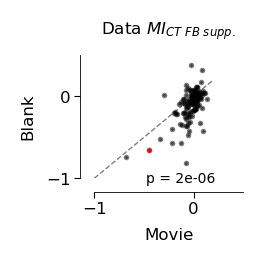

In [34]:
figsize = (1.2, 1.2)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-1, 0.2], [-1, 0.2], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(omis_movie, omis_blank, color='k', s=4, alpha=0.5)
    ax.scatter(key_omi_movie, key_omi_blank, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_ylim([-1, 0.5])
    ax.set_xlim([-1, 0.5])
    ax.set_title('Data $MI_{CT~FB~supp.}$', y=1.1)
    
    txt = f'p = {formatted_p_value}' 
    ax.text(0.35, 0.05, txt, va='top', fontsize=5, transform=ax.transAxes, color='k') 
    
    sns.despine(offset=5, trim=False, ax=ax)

## Rate of change (RoC) of firing rates

In [7]:
filename = './data/populaion_opto_effects_June24.h5'
df_pop = pd.read_hdf(filename, "df")

df_pop = df_pop.query('FR_opto_blank > 0.1 or FR_ctrl_blank > 0.1')
len(df_pop)

120

In [8]:
movie_RoC, blank_RoC = np.hstack(df_pop['movie_RoC']), np.hstack(df_pop['blank_RoC'])

In [12]:
df_ex_key = df_pop[(df_pop['m']==key['m']) & (df_pop['s']==key['s']) &
                   (df_pop['e']==key['e']) & (df_pop['u']==key['u'])].reset_index()

In [13]:
key_movie_RoC, key_blank_RoC = df_ex_key['movie_RoC'][0], df_ex_key['blank_RoC'][0]

In [14]:
key_movie_RoC, key_blank_RoC

(-2.4945934065933972, -4.211238709677402)

In [15]:
stat_roc, p_value_roc = scipy.stats.wilcoxon(np.abs(blank_RoC), np.abs(movie_RoC), alternative='two-sided')
stat_roc, p_value_roc

(1244.0, 4.1409058264846964e-10)

In [23]:
formatted_p_value = "{:.0e}".format(p_value_roc)

In [16]:
np.mean(np.abs(movie_RoC)), np.mean(np.abs(blank_RoC))

(0.38354579566461694, 0.8884982752752955)

In [17]:
a, b = np.polyfit(np.abs(movie_RoC), np.abs(blank_RoC), 1)

In [18]:
np.mean(np.abs(movie_RoC)), np.mean(np.abs(blank_RoC))

(0.38354579566461694, 0.8884982752752955)

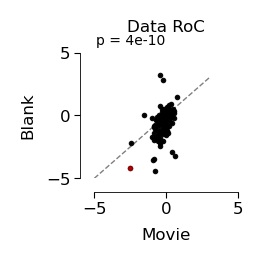

In [24]:
figsize = (1.2, 1.2)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-5, 3], [-5, 3], 'gray', linestyle='dashed', zorder=-1)
    ax.plot([-0.5, 0.1], [-0.5, 0.1], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(movie_RoC, blank_RoC, s=4, alpha=0.95, color='k')
    ax.scatter(key_movie_RoC, key_blank_RoC, c='r', s=4, alpha=0.5)
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    ax.set_title('Data RoC', y=1.1)
    txt = f'p = {formatted_p_value}'
    ax.text(0.01, 1.15, txt, va='top', fontsize=5, transform=ax.transAxes, color='k')

    sns.despine(offset=5, trim=False, ax=ax)

# Prediction modulation index CT FB supp. (opto)

### Load data

In [35]:
filename = './data/population_data_movie_June24.h5'
df_movie = pd.read_hdf(filename, "df")

df_movie = df_movie.query('fr_mean_spont_ctrl > 0.1')
len(df_movie)

120

In [36]:
filename = './data/population_data_blank_June24.h5'
df_blank = pd.read_hdf(filename, "df")

df_blank = df_blank.query('fr_mean_spont_ctrl > 0.1')
len(df_blank)

120

In [37]:
df_pop['model_simulated_omi_blank'] 

0      0.107893
1     -0.212598
2      0.145018
3     -0.160229
4      0.112258
         ...   
117    0.027594
118   -0.072659
119    0.048151
120    0.014878
121   -0.095639
Name: model_simulated_omi_blank, Length: 122, dtype: float32

In [38]:
filename = './data/populaion_opto_effects_June24.h5'
df_pop = pd.read_hdf(filename, "df")

df_pop = df_pop.query('FR_opto_blank > 0.1 or FR_ctrl_blank > 0.1')

omis_movie, omis_blank = np.hstack(df_pop['omi_movie']), np.hstack(df_pop['omi_blank'])

In [39]:
df_ex_key_movie = df_movie[(df_movie['m']==key['m']) & (df_movie['s']==key['s']) &
                           (df_movie['e']==key['e']) & (df_movie['u']==key['u'])].reset_index()

In [40]:
df_ex_key_blank = df_blank[(df_blank['m']==key['m']) & (df_blank['s']==key['s']) &
                           (df_blank['e']==key['e']) & (df_blank['u']==key['u'])].reset_index()

In [41]:
df_ex_key_opto_effect = df_pop[(df_pop['m']==key['m']) & (df_pop['s']==key['s']) &
                           (df_pop['e']==key['e']) & (df_pop['u']==key['u'])].reset_index()

In [42]:
model_simulated_omi_movie = df_pop['model_simulated_omi_movie'] 
model_simulated_omi_blank = df_pop['model_simulated_omi_blank'] 

model_simulated_RoC_movie = df_pop['model_simulated_RoC_movie'] 
model_simulated_RoC_blank = df_pop['model_simulated_RoC_blank'] 

In [43]:
model_simulated_omi_movie_ex = df_ex_key_opto_effect['model_simulated_omi_movie'] 
model_simulated_omi_blank_ex = df_ex_key_opto_effect['model_simulated_omi_blank'] 

model_simulated_RoC_movie_ex = df_ex_key_opto_effect['model_simulated_RoC_movie'] 
model_simulated_RoC_blank_ex = df_ex_key_opto_effect['model_simulated_RoC_blank'] 

In [44]:
stat, p_value_omi_model = scipy.stats.wilcoxon(model_simulated_omi_blank, model_simulated_omi_movie, alternative='two-sided')
stat, p_value_omi_model

(2504.0, 0.0031896224776051993)

In [45]:
formatted_p_value = "{:.0e}".format(p_value_omi_model)

In [134]:
np.mean(omi_blank_yhat_meaned), np.mean(omi_movie_yhat_meaned)

NameError: name 'omi_blank_yhat_meaned' is not defined

In [47]:
stat_model_roc, p_value_model_roc = scipy.stats.wilcoxon(model_simulated_RoC_blank, model_simulated_RoC_movie, alternative='two-sided')
stat_model_roc, p_value_model_roc

(2575.0, 0.005728910474189346)

In [48]:
formatted_p_value2 = "{:.0e}".format(p_value_model_roc)

### Plotting:

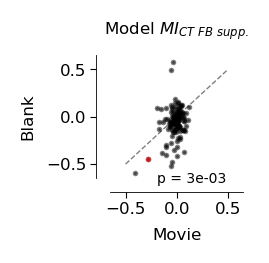

In [49]:
figsize = (1.2, 1.2)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-0.5, 0.5], [-0.5, 0.5], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(model_simulated_omi_movie, model_simulated_omi_blank, color='k', s=4, alpha=0.5)
    ax.scatter(model_simulated_omi_movie_ex, model_simulated_omi_blank_ex, c='r', s=4, alpha=0.5)
    txt = f'p = {formatted_p_value}' #np.round(p_value_omi_model, 3)}'
    ax.text(0.35, 0.05, txt, va='top', fontsize=5, transform=ax.transAxes, color='k')#, alpha=0.7)
        
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_ylim([-0.65, 0.65])
    ax.set_xlim([-0.65, 0.65])
    ax.set_title('Model $MI_{CT~FB~supp.}$', y=1.1)
    
    sns.despine(offset=5, trim=False, ax=ax)

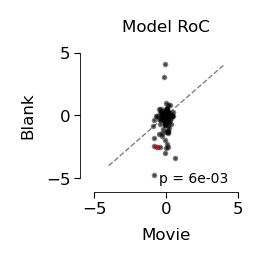

In [50]:
figsize = (1.2, 1.2)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.plot([-4, 4], [-4, 4], 'gray', linestyle='dashed', zorder=-1)
    ax.scatter(model_simulated_RoC_movie, model_simulated_RoC_blank, color='k', s=4, alpha=0.5)
    ax.scatter(model_simulated_RoC_movie_ex, model_simulated_RoC_blank_ex, c='r', s=4, alpha=0.5)
    
    
    txt = f'p = {formatted_p_value2}'
    ax.text(0.45, 0.05, txt, va='top', fontsize=5, transform=ax.transAxes, color='k') 
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_ylim([-5, 5])
    ax.set_xlim([-5, 5])
    ax.set_xticks([-5, 0, 5])
    ax.set_yticks([-5, 0, 5])
    ax.set_title('Model RoC', y=1.1)

    sns.despine(offset=5, trim=False, ax=ax)

# Neurons' counts

In [251]:
print(len(np.where(np.abs(omis_movie) >= 0.1)[0])) # data movie modulated neurons
print(len(np.where(np.abs(omis_blank) >= 0.1)[0])) # data blank modulated neurons
print(len(np.where(np.abs(omi_movie_yhat_meaned) >= 0.1)[0])) # model movie modulated neurons
print(len(np.where(np.abs(omi_blank_yhat_meaned) >= 0.1)[0])) # model blank modulated neurons
print(len(movie_opto_significant_models_df))   # significant movie models
print(len(blank_opto_significant_models_df))      

22
55
15
52
12
21


In [252]:
# Heights of the bars
heights = np.array([
                    len(np.where(np.abs(omis_blank) >= 0.1)[0]), # data blank modulated neurons
                    len(np.where(np.abs(omis_movie) >= 0.1)[0]), # data movie modulated neurons
                    
                    len(np.where(np.abs(omi_blank_yhat_meaned) >= 0.1)[0]), # model blank modulated neurons
                    len(np.where(np.abs(omi_movie_yhat_meaned) >= 0.1)[0]), # model movie modulated neurons
                    
                    len(blank_opto_significant_models_df),
                    len(movie_opto_significant_models_df),   # significant movie models
                ])*100/122.0

heights

array([45.08196721, 18.03278689, 42.62295082, 12.29508197, 17.21311475,
        9.83606557])

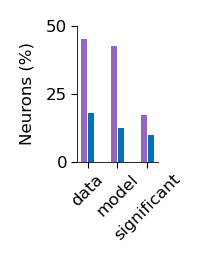

In [254]:
figsize = (0.9, 1.2)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.bar([-0.5, 0.5, 3.5, 4.5, 7.5, 8.5], heights, color=[color_dict['blue_pink'], color_dict['blue'], 
                                                            color_dict['blue_pink'], color_dict['blue'],
                                                            color_dict['blue_pink'],color_dict['blue']])
    ax.set_xticks([0, 4, 8], labels=['data', 'model', 'significant'], rotation=45)
    ax.set_ylabel('Neurons (%)')
    ax.set_xlabel('')
    ax.set_ylim([0, 50])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

# Neurons count matrix

In [255]:
def find_keys_with_p(ps, p_thr=0.01, p_lower_limit = 0.0):
    inds_thr = np.where(np.array(ps) <= p_thr)[0]
    if p_lower_limit != 0.0:
        inds_lower_limit = np.where(np.array(ps) > p_lower_limit)[0]
        inds = np.intersect1d(inds_thr, inds_lower_limit)
    else:
        inds = inds_thr
        
    return inds, np.array(ps)[inds]


def find_keys_within_range(omis, omi_lower, omi_upper):
    inds_lower = np.where(np.array(omis) > omi_lower)[0]
    inds_upper = np.where(np.array(omis) <= omi_upper)[0]
    inds = np.intersect1d(inds_lower, inds_upper)
    
    return inds, np.array(omis)[inds]

## Data

In [256]:
stim_neg, _ = find_keys_within_range(omis_movie, -1.0, -0.1)
stim_null, _ = find_keys_within_range(omis_movie, -0.1, 0.1)
stim_pos, _ = find_keys_within_range(omis_movie, 0.1, 1.0)

spont_neg, _ = find_keys_within_range(omis_blank, -1.0, -0.1)
spont_null, _ = find_keys_within_range(omis_blank, -0.1, 0.1)
spont_pos, _ = find_keys_within_range(omis_blank, 0.1, 1.0)


len(stim_neg), len(stim_null), len(stim_pos), len(spont_neg), len(spont_null), len(spont_pos)

(19, 100, 3, 47, 66, 8)

In [257]:
stim_neg_spont_neg = np.intersect1d(stim_neg, spont_neg)
stim_neg_spont_null = np.intersect1d(stim_neg, spont_null)
stim_neg_spont_pos = np.intersect1d(stim_neg, spont_pos)

stim_null_spont_neg = np.intersect1d(stim_null, spont_neg)
stim_null_spont_null = np.intersect1d(stim_null, spont_null)
stim_null_spont_pos = np.intersect1d(stim_null, spont_pos)

stim_pos_spont_neg = np.intersect1d(stim_pos, spont_neg)
stim_pos_spont_null = np.intersect1d(stim_pos, spont_null)
stim_pos_spont_pos = np.intersect1d(stim_pos, spont_pos)

len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos), \
len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos), \
len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)

(13, 5, 1, 34, 58, 7, 0, 3, 0)

In [258]:
col1 = np.array([len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos)])
col2 = np.array([len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos)])
col3 = np.array([len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)])

mat = [col1[::-1], col2[::-1], col3[::-1]]

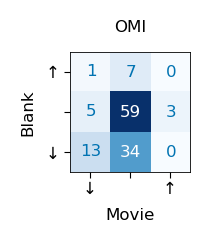

In [95]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.imshow(np.array(mat).T, cmap='Blues')
    ax.text(-0.1, 0.1, col1[-1], color=color_dict['blue'])
    ax.text(-0.1, 1.1, col1[-2], color=color_dict['blue'])
    ax.text(-0.25, 2.1, col1[0], color=color_dict['blue'])

    ax.text(0.9, 0.12, col2[-1], color=color_dict['blue'])
    ax.text(0.75, 1.12, col2[-2], color='white')
    ax.text(0.75, 2.12, col2[0], color='white')

    ax.text(1.9, 0.12, col3[-1], color=color_dict['blue'])
    ax.text(1.9, 1.12, col3[-2], color=color_dict['blue'])
    ax.text(1.9, 2.12, col3[0], color=color_dict['blue'])
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xticks([0, 1, 2], [u'\u2193', '', u'\u2191'])
    ax.set_yticks([2, 1, 0], [u'\u2193', '', u'\u2191'])
    ax.set_title('OMI', y=1.1)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

### Model

In [262]:
stim_neg, _ = find_keys_within_range(omi_movie_yhat_meaned, -1, -0.1)
stim_null, _ = find_keys_within_range(omi_movie_yhat_meaned, -0.1, 0.1)
stim_pos, _ = find_keys_within_range(omi_movie_yhat_meaned, 0.1, 1)

spont_neg, _ = find_keys_within_range(omi_blank_yhat_meaned, -1, -0.1)
spont_null, _ = find_keys_within_range(omi_blank_yhat_meaned, -0.1, 0.1)
spont_pos, _ = find_keys_within_range(omi_blank_yhat_meaned, 0.1, 1)

len(stim_neg), len(stim_null), len(stim_pos), len(spont_neg), len(spont_null), len(spont_pos)

(13, 107, 2, 38, 70, 14)

In [263]:
stim_neg_spont_neg = np.intersect1d(stim_neg, spont_neg)
stim_neg_spont_null = np.intersect1d(stim_neg, spont_null)
stim_neg_spont_pos = np.intersect1d(stim_neg, spont_pos)

stim_null_spont_neg = np.intersect1d(stim_null, spont_neg)
stim_null_spont_null = np.intersect1d(stim_null, spont_null)
stim_null_spont_pos = np.intersect1d(stim_null, spont_pos)

stim_pos_spont_neg = np.intersect1d(stim_pos, spont_neg)
stim_pos_spont_null = np.intersect1d(stim_pos, spont_null)
stim_pos_spont_pos = np.intersect1d(stim_pos, spont_pos)

len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos), \
len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos), \
len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)

(7, 6, 0, 31, 63, 13, 0, 1, 1)

In [264]:
col1 = np.array([len(stim_neg_spont_neg), len(stim_neg_spont_null), len(stim_neg_spont_pos)])
col2 = np.array([len(stim_null_spont_neg), len(stim_null_spont_null), len(stim_null_spont_pos)])
col3 = np.array([len(stim_pos_spont_neg), len(stim_pos_spont_null), len(stim_pos_spont_pos)])

mat = [col1[::-1], col2[::-1], col3[::-1]]

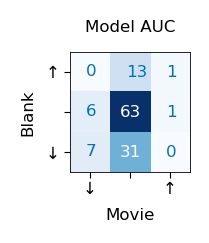

In [265]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.imshow(np.array(mat).T, cmap='Blues')
    ax.text(-0.1, 0.1, col1[-1], color=color_dict['blue'])
    ax.text(-0.1, 1.1, col1[-2], color=color_dict['blue'])
    ax.text(-0.1, 2.1, col1[0], color=color_dict['blue'])

    ax.text(0.9, 0.12, col2[-1], color=color_dict['blue'])
    ax.text(0.75, 1.12, col2[-2], color='white')
    ax.text(0.75, 2.12, col2[0], color='white')

    ax.text(1.9, 0.12, col3[-1], color=color_dict['blue'])
    ax.text(1.9, 1.12, col3[-2], color=color_dict['blue'])
    ax.text(1.9, 2.12, col3[0], color=color_dict['blue'])
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xticks([0, 1, 2], [u'\u2193', '', u'\u2191'])
    ax.set_yticks([2, 1, 0], [u'\u2193', '', u'\u2191'])
    ax.set_title('Model AUC', y=1.1)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

In [266]:
stim_3star, _ = find_keys_with_p(df_movie['perm_pvalue_opto'], p_thr=0.011, p_lower_limit = 0.0)
stim_1star, _ = find_keys_with_p(df_movie['perm_pvalue_opto'], p_thr=0.051, p_lower_limit = 0.01)
stim_0star, _ = find_keys_with_p(df_movie['perm_pvalue_opto'], p_thr=1.0, p_lower_limit = 0.05)

spont_3star, _ = find_keys_with_p(df_blank['perm_pvalue_opto'], p_thr=0.011, p_lower_limit = 0.0)
spont_1star, _ = find_keys_with_p(df_blank['perm_pvalue_opto'], p_thr=0.051, p_lower_limit = 0.01)
spont_0star, _ = find_keys_with_p(df_blank['perm_pvalue_opto'], p_thr=1.0, p_lower_limit = 0.05)

len(stim_3star), len(stim_1star), len(stim_0star), len(spont_3star), len(spont_1star), len(spont_0star)

(8, 4, 110, 13, 8, 101)

In [267]:
stim_3star_spont_3star = np.intersect1d(stim_3star, spont_3star)
stim_3star_spont_1star = np.intersect1d(stim_3star, spont_1star)
stim_3star_spont_0star = np.intersect1d(stim_3star, spont_0star)

stim_1star_spont_3star = np.intersect1d(stim_1star, spont_3star)
stim_1star_spont_1star = np.intersect1d(stim_1star, spont_1star)
stim_1star_spont_0star = np.intersect1d(stim_1star, spont_0star)

stim_0star_spont_3star = np.intersect1d(stim_0star, spont_3star)
stim_0star_spont_1star = np.intersect1d(stim_0star, spont_1star)
stim_0star_spont_0star = np.intersect1d(stim_0star, spont_0star)

len(stim_3star_spont_3star), len(stim_3star_spont_1star), len(stim_3star_spont_0star), \
len(stim_1star_spont_3star), len(stim_1star_spont_1star), len(stim_1star_spont_0star), \
len(stim_0star_spont_3star), len(stim_0star_spont_1star), len(stim_0star_spont_0star)

(4, 0, 4, 1, 0, 3, 8, 8, 94)

In [268]:
col1 = np.array([len(stim_0star_spont_0star), len(stim_0star_spont_1star), len(stim_0star_spont_3star)])
col2 = np.array([len(stim_1star_spont_0star), len(stim_1star_spont_1star), len(stim_1star_spont_3star)])
col3 = np.array([len(stim_3star_spont_0star), len(stim_3star_spont_1star), len(stim_3star_spont_3star)])

mat = [col1[::-1], col2[::-1], col3[::-1]]

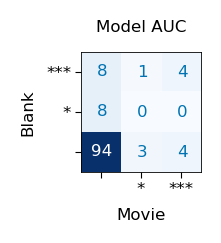

In [269]:
figsize = (1.1, 1.1)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    ax.imshow(np.array(mat).T, cmap='Blues')
    ax.text(-0.1, 0.1, col1[-1], color=color_dict['blue'])
    ax.text(-0.1, 1.1, col1[-2], color=color_dict['blue'])
    ax.text(-0.25, 2.1, col1[0], color='white')

    ax.text(0.9, 0.12, col2[-1], color=color_dict['blue'])
    ax.text(0.9, 1.12, col2[-2], color=color_dict['blue'])
    ax.text(0.9, 2.12, col2[0], color=color_dict['blue'])

    ax.text(1.9, 0.12, col3[-1], color=color_dict['blue'])
    ax.text(1.9, 1.12, col3[-2], color=color_dict['blue'])
    ax.text(1.9, 2.12, col3[0], color=color_dict['blue'])
    
    ax.set_ylabel('Blank')
    ax.set_xlabel('Movie')
    ax.set_xticks([0, 1, 2], ['', '*', '***'])
    ax.set_yticks([2, 1, 0], ['', '*', '***'])
    ax.set_title('Model AUC', y=1.1)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

# Supplementary Figure

* MI CT FB supp. vs Firing rates scatters
* resample trials to make sure it is not an artefact of trial numbers
* model intercepts well explains average firing rates, so filter weights are not affected
* compare stim models without movie input to make sure we have a fair comparison

## Firing rates does not explain OMI

In [149]:
FR_ctrl_movie = np.array(df_pop['FR_ctrl_movie'])
FR_ctrl_blank = np.array(df_pop['FR_ctrl_blank'])
omi_e = np.array(df_pop['omi_e'])
omi_movie = np.array(df_pop['omi_movie'])
omi_blank = np.array(df_pop['omi_blank'])

In [150]:
np.mean(df_pop['FR_ctrl_movie']) - np.mean(df_pop['FR_ctrl_blank'])

1.1419547333333355

In [151]:
np.mean(df_pop['FR_opto_movie']) - np.mean(df_pop['FR_opto_blank'])

1.8474270333333287

In [152]:
s, p = scipy.stats.wilcoxon(df_pop['FR_ctrl_movie'], df_pop['FR_ctrl_blank'], alternative='greater')
p

0.02728715914564366

In [153]:
np.mean(df_pop['FR_opto_movie']), np.mean(df_pop['FR_opto_blank'])

(11.665567249999999, 9.81814021666667)

In [154]:
num_bin = 12
counts_movie, bins_movie = np.histogram(FR_ctrl_movie, num_bin)
counts_blank, bins_blank = np.histogram(FR_ctrl_blank, bins = bins_movie)

In [155]:
neurons_per_bin = []
stim_omi_per_bin, spont_omi_per_bin = [], []
stim_omi_avgs, spont_omi_avgs = [], []
abs_flag = True

fr_bins_stim = np.zeros(len(FR_ctrl_movie))
fr_bins_spont = np.zeros(len(FR_ctrl_blank))

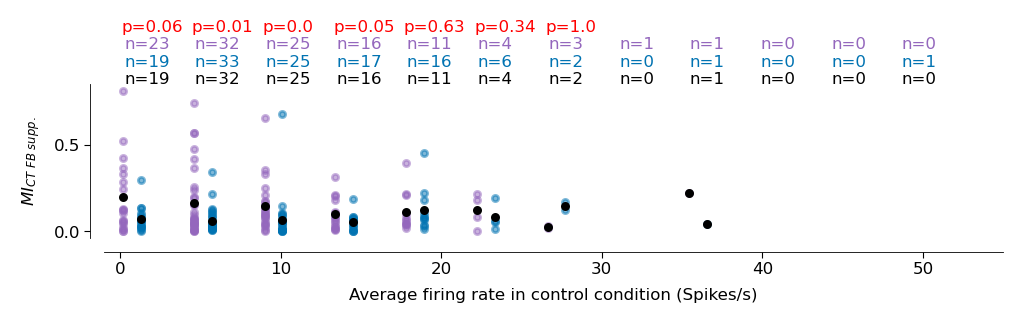

In [156]:
figsize = (5, 1.5)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    for i, (count_spont, count_stim, mabin) in enumerate(zip(counts_blank, counts_movie, bins_blank)):
        n = np.min([count_spont, count_stim])
        neurons_per_bin.append(n)

        stim_neurons = find_neurons_per_bins(FR_ctrl_movie, mabin, bins_blank[i+1])
        assert len(stim_neurons) == count_stim

        for stn in stim_neurons:
            fr_bins_stim[stn] = mabin

        spont_neurons = find_neurons_per_bins(FR_ctrl_blank, mabin, bins_blank[i+1])
        assert len(spont_neurons) == count_spont

        for stn in spont_neurons:
            fr_bins_spont[stn] = mabin

        if count_spont == count_stim:
            mabin_omis_stim = omi_movie[stim_neurons]
            mabin_omis_spont = omi_blank[spont_neurons]

        elif count_spont > count_stim:
            mabin_omis_stim = omi_movie[stim_neurons]

            inds = np.arange(len(spont_neurons))
            np.random.shuffle(inds)
            samples = inds[:n]
            sampled_spont_neurons = spont_neurons[samples]

            mabin_omis_spont = omi_blank[sampled_spont_neurons]

        elif count_spont < count_stim:
            mabin_omis_spont = omi_blank[spont_neurons]

            inds = np.arange(len(stim_neurons))
            np.random.shuffle(inds)
            samples = inds[:n]
            sampled_stim_neurons = stim_neurons[samples]
            mabin_omis_stim = omi_movie[sampled_stim_neurons]

        if abs_flag:
            mabin_omis_stim = np.abs(mabin_omis_stim)
            mabin_omis_spont = np.abs(mabin_omis_spont)

        if n > 0:
            stim_omi_avg = np.mean(mabin_omis_stim)
            spont_omi_avg = np.mean(mabin_omis_spont)
        else:
            stim_omi_avg = None
            spont_omi_avg = None

        ax.scatter([mabin - 0.55]*n, mabin_omis_spont, color=color_dict['blue_pink'], alpha=0.5, s=20)
        ax.scatter([mabin + 0.55]*n, mabin_omis_stim, color=color_dict['blue'], alpha=0.5, s=20)
        ax.scatter(mabin - 0.55, spont_omi_avg, color='k', s=20)
        ax.scatter(mabin + 0.55, stim_omi_avg, color='k', s=20)

        ax.text(mabin-0.5, 0.85, 'n='+str(n), fontsize=6)
        ax.text(mabin-0.5, 0.95, 'n='+str(count_stim), c=color_dict['blue'], fontsize=6)
        ax.text(mabin-0.5, 1.05, 'n='+str(count_spont), c=color_dict['blue_pink'], fontsize=6)
        
        if len(mabin_omis_stim) >= 2 and len(mabin_omis_spont) >= 2:
            s, pp = scipy.stats.mannwhitneyu(mabin_omis_stim, mabin_omis_spont, alternative='less')
            ax.text(mabin-0.7, 1.15, 'p='+str(np.round(pp, 2)), c='r', fontsize=6)
    
    ax.set_xlim([-1, 55])    
    ax.set_xlabel('Average firing rate in control condition (Spikes/s)')
    ax.set_ylabel('$MI_{CT~FB~supp.}$')
    
    sns.despine(offset=5, trim=False, ax=ax)

## Number of trials does not explain MI CT FB supp. 

In [157]:
filename = './data/populaion_opto_effects_resampled.h5'
filename = './data/populaion_opto_effects_June24.h5'
df_pop_resampled = pd.read_hdf(filename, "df")

In [162]:
omi_e = np.array(df_pop_resampled['omi_e'])
omi_movie = np.array(df_pop_resampled['omi_movie'])
omi_blank = np.array(df_pop_resampled['omi_blank'])
new_omi_movie = np.vstack(df_pop_resampled['omi_movie_resmpled'])
new_omi_blank = np.vstack(df_pop_resampled['omi_blank_resmpled'])

In [170]:
to_sort = [np.nanmean(oo) for oo in new_omi_movie]
stds = [np.std(oo) for oo in new_omi_movie]

inds = np.argsort(to_sort)
sorted_omi_movie = np.array(new_omi_movie)[inds]

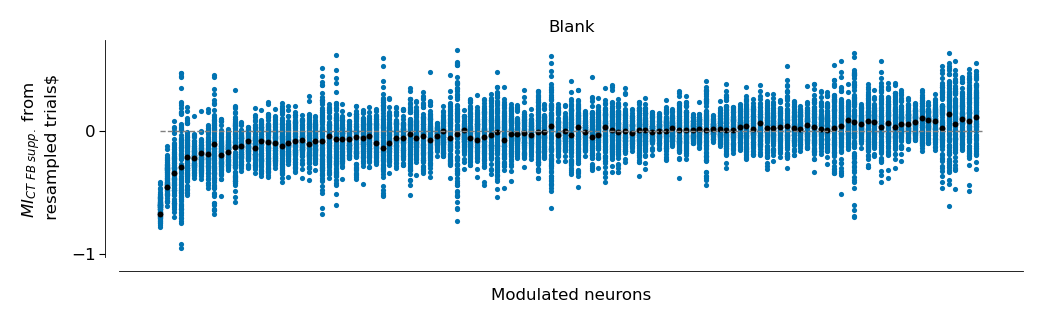

In [160]:
figsize = (5.1, 1.5)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    
    for i, oo in enumerate(sorted_omi_movie):
        ax.scatter([i]*len(oo), oo, color=color_dict['blue'], s=3)

    ax.scatter(np.arange(len(new_omi_movie)), np.array(omi_movie)[inds], color='k', s=5)
    
    ax.hlines(0, 0, 122, 'gray', 'dashed')
    ax.set_xticks([])
    ax.set_xlabel('Modulated neurons')
    ax.set_ylabel('$MI_{CT~FB~supp.}$ from \n resampled trials$')
    ax.set_title('Blank')
    
    sns.despine(offset=5, trim=False, ax=ax)

In [173]:
to_sort = [np.nanmean(oo) for oo in new_omi_blank]
to_sort = omi_blank
stds = [np.std(oo) for oo in new_omi_blank]

inds = np.argsort(to_sort)
sorted_omi_spont = np.array(new_omi_blank)[inds]

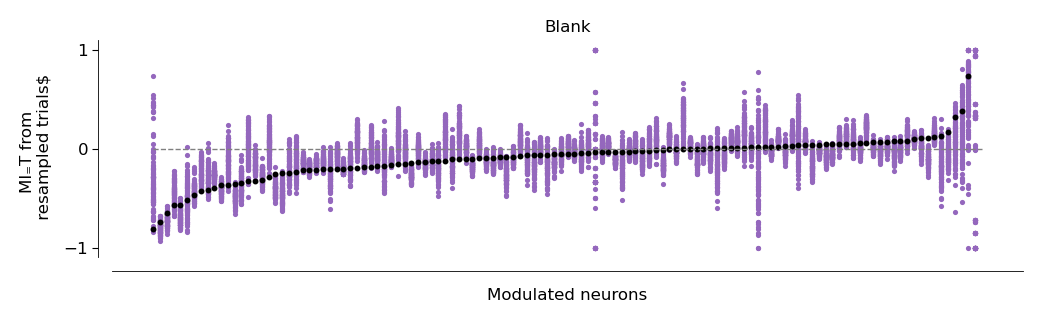

In [174]:
figsize = (5.1, 1.5)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']

    for i, oo in enumerate(sorted_omi_spont):
        ax.scatter([i]*len(oo), oo, color=color_dict['blue_pink'], s=3)

    ax.scatter(np.arange(len(new_omi_blank)), np.array(omi_blank)[inds], color='k', s=5)
    
    ax.hlines(0, 0, 122, 'gray', 'dashed')
    ax.set_xticks([])
    ax.set_xlabel('Modulated neurons')
    ax.set_ylabel('MI\u208CT from \n resampled trials$')
    ax.set_title('Blank')

    sns.despine(offset=5, trim=False, ax=ax)

In [175]:
sorted_omi_stim = np.array(new_omi_movie)[inds]

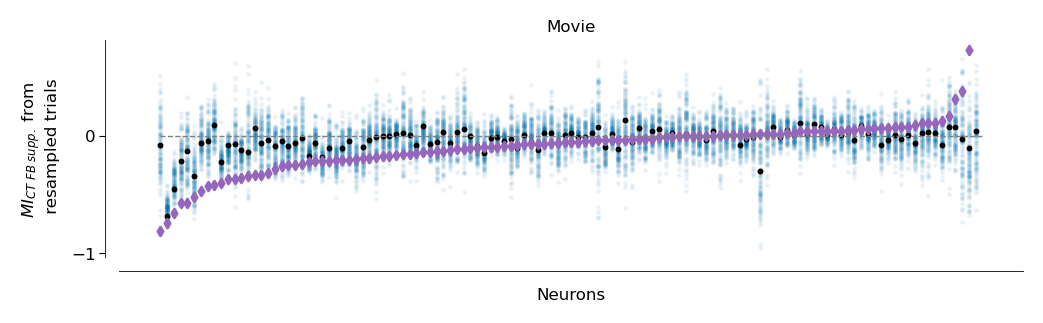

In [177]:
figsize = (5.1, 1.5)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']

    for i, oo in enumerate(sorted_omi_stim):
        ax.scatter([i]*len(oo), oo, color=color_dict['blue'], s=3, alpha=0.06)

    ax.scatter(np.arange(len(new_omi_movie)), np.array(omi_movie)[inds], edgecolor='k', color=None, s=5)
    ax.scatter(np.arange(len(new_omi_blank)), np.array(omi_blank)[inds], color=color_dict['blue_pink'], marker='d', s=5)
    
    ax.hlines(0, 0, 122, 'gray', 'dashed')
    ax.set_xticks([])
    ax.set_xlabel('Neurons')
    ax.set_ylabel('$MI_{CT~FB~supp.}$ from \n resampled trials')
    ax.set_title('Movie')
    
    sns.despine(offset=5, trim=False, ax=ax)

## Does intercept explain firing rates? Or do they affect kernel minumum?

In [309]:
filename = './data/population_data_movie_June24.h5'
df_movie = pd.read_hdf(filename, "df")

In [310]:
filename = './data/population_data_blank_June24.h5'
df_blank = pd.read_hdf(filename, "df")

In [311]:
filename = './data/populaion_opto_effects_June24.h5'
df_pop = pd.read_hdf(filename, "df")

In [314]:
omi_e = np.array(df_pop['omi_e'])
omi_movie = np.array(df_pop['omi_movie'])
omi_blank = np.array(df_pop['omi_blank'])

In [330]:
mod_idx_movie = np.where(df_movie['perm_pvalue_opto'] <= 0.05)[0]
len(mod_idx_movie)

12

In [331]:
mod_idx_blank = np.where(df_blank['perm_pvalue_opto'] <= 0.05)[0]
len(mod_idx_blank)

21

In [319]:
mod_idx = np.unique(np.concatenate((mod_idx_blank, mod_idx_movie)))

In [332]:
intercept_movie = np.array(df_movie['b'])
intercept_blank = np.array(df_blank['b'])

In [333]:
min_movie = [np.min(ok) for ok in np.array(df_movie['filt_opto'])]
min_blank = [np.min(ok) for ok in np.array(df_blank['filt_opto'])]

In [334]:
FR_ctrl_movie = (np.array(df_pop['FR_ctrl_movie'])) 
FR_ctrl_blank = (np.array(df_pop['FR_ctrl_blank'])) 

In [335]:
# Find line of best fit
from sklearn.metrics import r2_score
a, b = np.polyfit(np.abs(min_movie)[mod_idx_movie], FR_ctrl_movie[mod_idx_movie], 1)
r2 = r2_score(FR_ctrl_movie[mod_idx_movie], (np.abs(min_movie)[mod_idx_movie]*a)+b)

a_blank, b_blank = np.polyfit(np.abs(min_blank)[mod_idx_blank], FR_ctrl_blank[mod_idx_blank], 1)
r2_blank = r2_score(FR_ctrl_blank[mod_idx_blank], (np.abs(min_blank)[mod_idx_blank]*a_blank)+b_blank)

In [336]:
# Calculation correlation coefficient and p-value between x and y
r_movie, p_movie = pearsonr(np.abs(min_movie)[mod_idx_movie], FR_ctrl_movie[mod_idx_movie])
r_blank, p_blank = pearsonr(np.abs(min_blank)[mod_idx_blank], FR_ctrl_blank[mod_idx_blank])

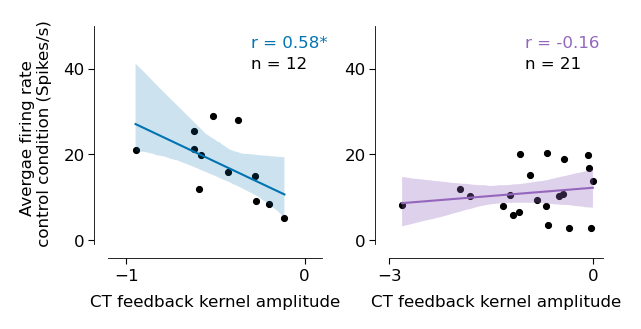

In [652]:
figsize = (3.0, 1.5)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.scatter(np.array(min_movie)[mod_idx_movie], FR_ctrl_movie[mod_idx_movie], c='k', s=10)
    sns.regplot(x=np.array(min_movie)[mod_idx_movie], y=FR_ctrl_movie[mod_idx_movie], ax=ax, scatter=False, color=color_dict['blue'])
    ax.collections[1].set_alpha(0.2)
    txt = 'r = ' + str(np.round(r_movie, 2))
    if p_movie <= 0.01:
        txt += '***'
    elif p_movie <= 0.05:
        txt += '*'
    ax.text(-0.3, 45, s=txt, c=color_dict['blue'])
    txt = 'n = ' + str(len(mod_idx_movie))
    ax.text(-0.3, 40, s=txt, c='k')
    ax.set_ylim([-1, 50])
    ax.set_xlim([-1.1, 0.1])  
    ax.set_ylabel('Avergae firing rate \n control condition (Spikes/s)')
    ax.set_xlabel('CT feedback kernel amplitude')
    sns.despine(offset=5, trim=False, ax=ax)
    
    ax = ax_dict['b']
    ax.scatter(np.array(min_blank)[mod_idx_blank], FR_ctrl_blank[mod_idx_blank], c='k', s=10)
    sns.regplot(x=np.array(min_blank)[mod_idx_blank], y=FR_ctrl_blank[mod_idx_blank], ax=ax, scatter=False, color=color_dict['blue_pink'])
    ax.collections[1].set_alpha(0.3)
    txt = 'r = ' + str(np.round(r_blank, 2))
    if p_blank <= 0.01:
        txt += '***'
    elif p_blank <= 0.05:
        txt += '*'
    ax.text(-1., 45, s=txt, c=color_dict['blue_pink'])
    txt = 'n = ' + str(len(mod_idx_blank))
    ax.text(-1., 40, s=txt, c='k')
    ax.set_ylim([-1, 50])
    ax.set_xlim([-3, 0.15])
    ax.set_xticks([-3, 0])
    ax.set_xlabel('CT feedback kernel amplitude')
    
    sns.despine(offset=5, trim=False, ax=ax)

In [327]:
# Find line of best fit
a, b = np.polyfit(np.abs(intercept_movie), FR_ctrl_movie, 1)
r2 = r2_score(FR_ctrl_movie, (np.abs(intercept_movie)*a)+b)

a_blank, b_blank = np.polyfit(np.abs(intercept_blank), FR_ctrl_blank, 1)
r2_blank = r2_score(FR_ctrl_blank, (np.abs(intercept_blank)*a_blank)+b_blank)

In [328]:
# Calculation correlation coefficient and p-value between x and y
r_movie, p_movie = pearsonr(np.abs(intercept_movie), FR_ctrl_movie)
r_blank, p_blank = pearsonr(np.abs(intercept_blank), FR_ctrl_blank)

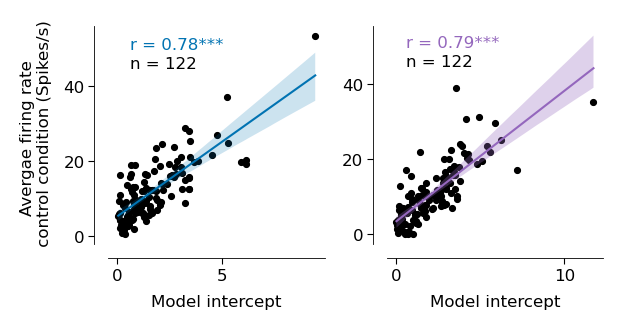

In [655]:
figsize = (3.0, 1.5)

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=figsize,
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    ax = ax_dict['a']
    ax.scatter(np.abs(intercept_movie), FR_ctrl_movie, c='k', s=10)
    sns.regplot(x=np.abs(intercept_movie), y=FR_ctrl_movie, ax=ax,
                fit_reg=True,
                scatter=False, color=color_dict['blue'])
    ax.collections[1].set_alpha(0.2)
    
    txt = 'r = ' + str(np.round(r_movie, 2))
    if p_movie <= 0.01:
        txt += '***'
    elif p_movie <= 0.05:
        txt += '*'
    ax.text(0.6, 50, s=txt, c=color_dict['blue'])
    txt = 'n = ' + str(len(FR_ctrl_movie))
    ax.text(0.6, 45, s=txt, c='k')
    ax.set_ylabel('Avergae firing rate \n control condition (Spikes/s)')
    ax.set_xlabel('Model intercept')
    sns.despine(offset=5, trim=False, ax=ax)
    
    
    ax = ax_dict['b']
    ax.scatter(np.abs(intercept_blank), FR_ctrl_blank, c='k', s=10)
    sns.regplot(x=np.abs(intercept_blank), y=FR_ctrl_blank, ax=ax, scatter=False, color=color_dict['blue_pink'], scatter_kws={'alpha': 0.2})
    ax.collections[1].set_alpha(0.3)
    
    txt = 'r = ' + str(np.round(r_blank, 2))
    if p_blank <= 0.01:
        txt += '***'
    elif p_blank <= 0.05:
        txt += '*'
    ax.text(0.6, 50, s=txt, c=color_dict['blue_pink'])
    txt = 'n = ' + str(len(FR_ctrl_blank))
    ax.text(0.6, 45, s=txt, c='k')
    ax.set_xlabel('Model intercept')
    sns.despine(offset=5, trim=False, ax=ax)